# 1st Assignment on Medical Image Processing

## LU 183.630 - 2025 SoSe

---

### 2. Assignment

The aim of the first lab exercise is to get familiar with **Python**, the implementation of **Principal Component Analysis (PCA)**, and the investigation of its characteristics. Parts of the code (data, plot functions) are provided so that students can focus on the main topics of the assignment.

---

#### 2.1 Helper Functions in helper_functions.py

- `get_data()` loads all the neccecary variables that you will be working on
- `plot2DPCA()` and `plot3DPCA()` can be used to plot:
  - Data points
  - Eigenvectors & eigenvalues
  - Ellipses & ellipsoids
  - Reconstructed data
- `plotDemo()` demonstrates their usage.

In [3]:
import sys
print(sys.executable)


/Users/nikoczernin/opt/anaconda3/envs/pca-env/bin/python


### Import necessary libraries and functions for this assignment

In [2]:
from helper_functions import plot2DPCA, plot3DPCA, get_data, plotDemo
import numpy as np
import matplotlib.pyplot as plt

# Demo

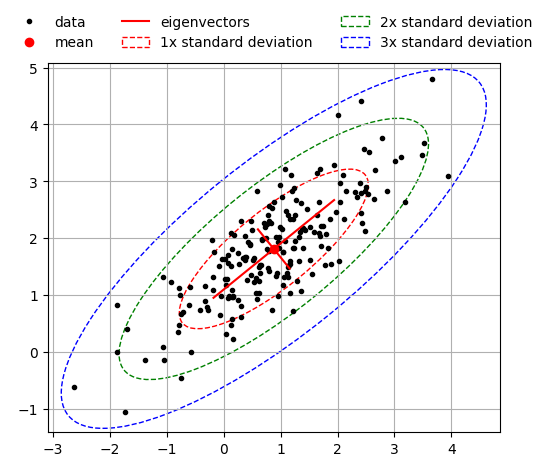

In [4]:
plotDemo()

### Load the data used in this assignment

In [8]:
#load data using helper function
data0, data1, data2, data3d, bones = get_data()

data0 shape: (200, 2)
data1 shape: (200, 2)
data2 shape: (200, 2)
data3d shape: (1000, 3)
bones shape: (128, 2, 14)


## Tasks: 
#### In this exercise, data points are given in a d × n-Matrix X, where n denotes the number of points and their dimensionality, i.e. 2 × n  for a set of 2D points (data0, data1, data2) and 3 × n for points in 3D (data3d).

## 1. Covariance Matrix

#### (a) Implement a function `ourCov(X)` that computes the covariance matrix `C` from a data matrix `X`. (3 Points)

- You are **not allowed** to use any built-in function that directly computes the covariance matrix.
- You **may use** basic NumPy operations such as `mean`, matrix multiplication, and `transpose`.
- After implementing `ourCov`, **compare** its output to the result of `np.cov`.
  - **Note:** `np.cov` expects a matrix of shape **d × n** (n_features × n_samples), so you may need to transpose your input before using it.

In [9]:
def ourCov(X):
    """
    Computes the covariance matrix of the input data X.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features)

    Returns:
        C (numpy.ndarray): Covariance matrix
    """
    
    # Get number of samples
    # We use shape method to get the number of samples
    # in the first dimension of the data
    n_samples = X.shape[0]

    # Compute the mean vector
    mean_vector = np.mean(X, axis=0)

    # Center the data
    X_centered = X - mean_vector

    # Compute the covariance matrix
    C = np.dot(X_centered.T, X_centered) / (n_samples - 1)

    return C

In [10]:
for data in [data0, data1, data2]:

    print('ourCov')
    print(ourCov(data), '\n\n')

    print('np.cov')
    print(np.cov(data.T, bias=True), '\n\n')

ourCov
[[0.93801567 0.67673206]
 [0.67673206 1.03561669]] 


np.cov
[[0.93332559 0.6733484 ]
 [0.6733484  1.03043861]] 


ourCov
[[ 0.92874144 -0.90833726]
 [-0.90833726  0.99135749]] 


np.cov
[[ 0.92409773 -0.90379557]
 [-0.90379557  0.98640071]] 


ourCov
[[0.88767296 0.01673861]
 [0.01673861 1.00601482]] 


np.cov
[[0.88323459 0.01665492]
 [0.01665492 1.00098475]] 




### (b) Compute the covariance matrix `C` for all data matrices (`data0`, `data1`, `data2`). (3 Points)

- Visualize each dataset using `plt.scatter()` in **separate figures**.
- Set the axis scale to equal using `plt.axis('equal')`.
- **Interpret the resulting covariance matrices** for each dataset:
  - What do the individual entries of `C` represent?
  - Which position in `C` holds which type of information (e.g., variance, correlation)?

Covariance matrix for data1:
[[0.93801567 0.67673206]
 [0.67673206 1.03561669]] 




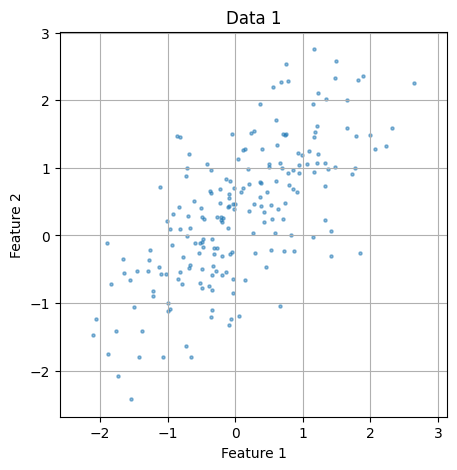

Covariance matrix for data2:
[[ 0.92874144 -0.90833726]
 [-0.90833726  0.99135749]] 




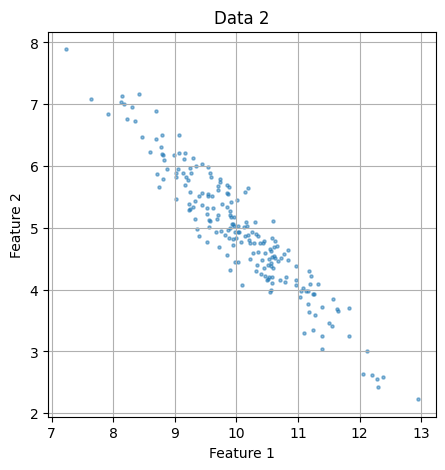

Covariance matrix for data3:
[[0.88767296 0.01673861]
 [0.01673861 1.00601482]] 




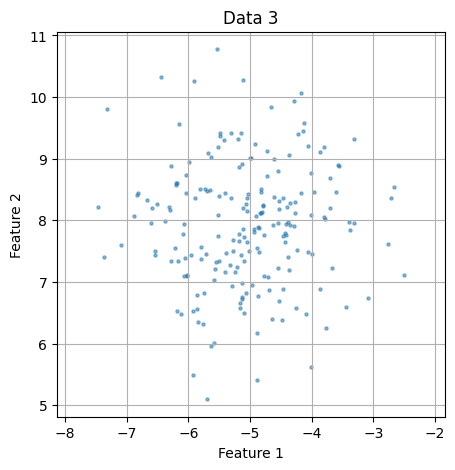

In [11]:
import matplotlib.pyplot as plt

for i, data in enumerate([data0, data1, data2], start=1):
    
    fig = plt.figure(figsize=(5, 5))

    # TODO: Compute and print the covariance matrix
    C = ourCov(data)
    print(f'Covariance matrix for data{i}:')
    print(C, '\n\n')

    # TODO: Plot the data
    ax = fig.add_subplot(111)
    ax.scatter(data[:, 0], data[:, 1], s=5, alpha=0.5)
    ax.set_title(f'Data {i}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.axis('equal')
    ax.grid()
    plt.show()
    

## 2. PCA

### (a) Implement a function `pca(X, n_components)` that performs Principal Component Analysis (PCA) on a data matrix `X`. (3 Points)

- The implementation must work for data of **any dimensionality** (i.e., arbitrary number of features).
- The function should return:
  - The **eigenvalues**, sorted in **descending order**.
  - The corresponding **normalized eigenvectors**, sorted according to their eigenvalues.
- You may use NumPy’s `np.linalg.eig()` function to compute eigenvalues and eigenvectors.

In [49]:
def pca(X, n_components=None):
    """
    Perform Principal Component Analysis (PCA) on the input data matrix X.

    Parameters:
        X (numpy.ndarray): Input data of shape (n_samples, n_features)
        n_components (int or None): Number of principal components to retain. If 'None' retain all

    Returns:
        X_reduced (numpy.ndarray): Projected data
        eigvecs_reduced (numpy.ndarray): Selected eigenvectors
        eigvals_selected (numpy.ndarray): Selected eigenvalues
        mean (numpy.ndarray): Mean used for centering
    """

    # Center the data
    mean = np.mean(X, axis=0)
    X_center = X - mean
    
    # Compute the covariance matrix
    C = ourCov(X_center)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(C)
    
    # Sort eigenvalues and eigenvectors in descending order
    ids_ordered = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[ids_ordered]
    eigenvectors = eigenvectors[:, ids_ordered]

    # Select the top n_components
    if n_components is None:
        eigvals_selected = eigenvalues
        eigvecs_reduced = eigenvectors
    else:
        eigvals_selected = eigenvalues[:n_components]
        eigvecs_reduced = eigenvectors[:, :n_components]

    # Project data onto principal components using the dot-projuct
    X_reduced = np.dot(X_center, eigvecs_reduced)
    
    return X_reduced, eigvecs_reduced, eigvals_selected, mean


### (b) Use plot2DPCA to plot results for all matrices (data0, data1, data2) (2 Points)

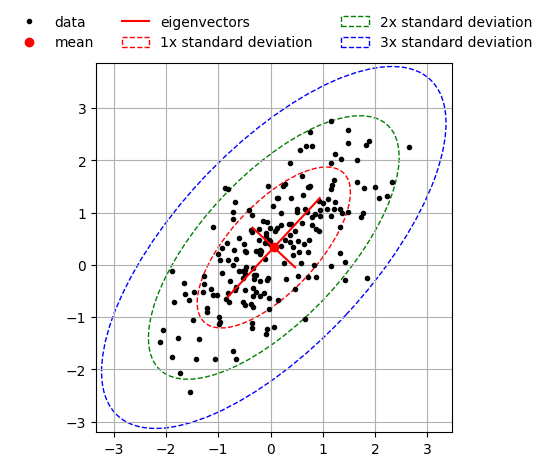

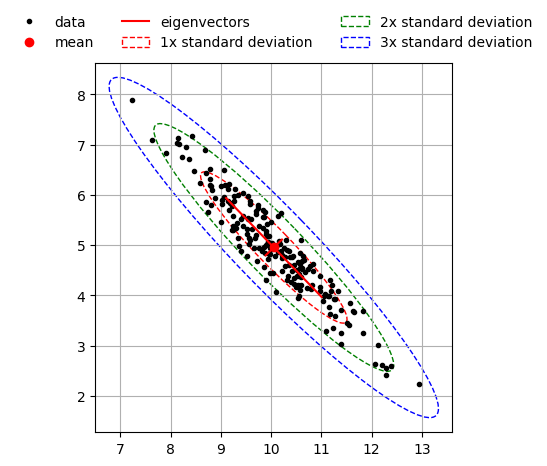

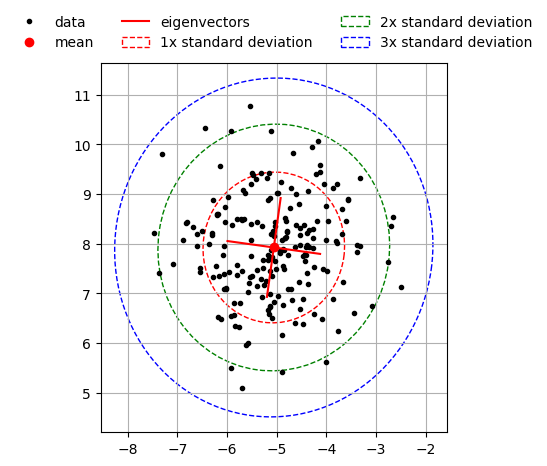

In [51]:
for data in [data0, data1, data2]:

    data_pca, eigVec, eigVal, mean = pca(data)
    #print(eigVal)
    #print(eigVec)
    # Plot using the plot2DPCA function
    plot2DPCA(
        data=data,
        mju=mean,
        eigVec=eigVec,
        eigVal=eigVal,
        showStd=True,
    )

### (c) What do the **eigenvectors** represent?  (2 Points)
- Where can this information be seen in the plot?  

The eigenvectors, the red lines in the scatterplots, represent the variance of the attributes, where the lines point in the direction in which the attributes vary the most and the length of the lines represent how much they vary in that direction.


### (d) What do the **eigenvalues** represent?  (3 Points)
- Where can this information be seen in the plot?  
- Is there a connection to the **total variance** of the data?  

The eigenvalues quantify how much of the original attribute's variance can be explained by the corresponding eigenvector, where a higher eigenvalue means more variance explained. If there are some high eigenvalues and some very low ones, that means that of the projected data, keeping only the ones with a high corresponding eigenvalue would leave you with data that is of lower dimension but still explains most of your data's variance, which is enables dimensionality reduction. 

### (e) How does **omitting the mean subtraction** from the data matrix `X` affect the computation of PCA? (2 Points)
- Explain the consequences.  

The mean is liek the center of mass in the given data. PCA rotates the dataset to find maximum variances along the base-axes and then projects that rotation to the original data. But if the data does not have its center, i.e. its mean, at the origin, the first principal components would also adjust toward the mean and not just represent parts of the original variance. The impact of this should be larger for dataset 1 and 2 than for dataset 0, as dataset 0 is already almost mean-centered as is.

## 3. Subspace projection

### (a) PCA Projection and Reconstruction on 2D Data

First: **(2 Points)**
- Perform **PCA** on `data1`.
- Project the data onto the **first principal component** (main vector).
- **Plot** the projected data.
- What is the **dimensionality** of the data after projection?

Second: **(3 Points)**
- Reconstruct the data from the projection back into the original 2D space.
- Plot the reconstructed data alongside the original data using `plot2DPCA`
- **Describe** the effects of the projection and reconstruction:
  - How do the reconstructed points compare to the original ones?
- Compute the **average reconstruction error** (e.g., mean squared error between original and reconstructed points).
- How would the **average reconstruction error** change if you did the same for `data2`

In [ ]:
# TODO: Apply PCA and project to first component

# TODO: Visualize projection

# TODO: Print the shape of the projected data

# TODO: Reconstruct from projection

# TODO: Plot reconstruction and compare to original


# TODO: Compute reconstruction error and print it

print(f"Average reconstruction error for data1: {reconstruction_error_data1:.4f}")

# TODO : Repeat for data2 and compare results

print(f"Average reconstruction error for data2: {reconstruction_error_data2:.4f}")


### (b) Reconstruction Using the Second Principal Component (2 Points)

- Repeat the steps from (a), but this time project the data onto the **second principal component** (side vector).
- Reconstruct the data and analyze the results.
- Which principal component would you choose to achieve a reconstruction with **minimal error**, using **only one component**?
  - Justify your answer based on error and visual comparison.

In [ ]:
# TODO: Reconstruct from projection

# TODO: Plot reconstruction and compare to original

# TODO: Compute reconstruction error)

print(f"Average reconstruction error for data1: {reconstruction_error_second_component:.4f}")

## 4. Investigation in 3D

### (a) PCA and 3D Visualization (3 Points)
- Perform **PCA** on the `data3d`.
- Plot the original data points in **3D**, along with the **eigenvectors** of the covariance matrix.
- **Describe the relationships** between:
  - The **covariance matrix**
  - The **eigenvalues**
  - The **eigenvectors**

In [ ]:
# TODO: print covariance matrix

# TODO: Apply PCA to 3D data

# TODO: plot using the plot3DPCA function




### (b) Projection and Reconstruction in Subspace (2 Points)

- Project the data onto the subspace spanned by the **first two principal components** (i.e., the top 2 eigenvectors).
- What is the **dimensionality** of the data after projection?
- Reconstruct the data from the 2D projection back into the original **3D** space.
- Plot both the **original** and the **reconstructed** data in 3D.
- **Discuss what type of information has been lost** due to the projection.

In [ ]:
# TODO: project data3d to first two principal components in and plot in 2D

# TODO: print dimensionality of X_reduced

# TODO: reconstruct from projection into 3D and plot using plot3DPCA

# TODO: Plot reconstruction using plot3DPCA

## 5. Shape Modeling

### (a) Data Exploration (2 Points)

- The variable `bones` has shape **(nPoints, nDimensions, nShapes)**.
- Visualize all bone shapes:
  - Use `plt.scatter` to plot **each shape** in **black** with transparency (`alpha=0.5`).
  - Compute and overlay the **mean shape** in **red**.
- Ensure all bones are plotted in a **single figure** for comparison.

In [ ]:
fig = plt.figure(figsize=(4, 8))

# TODO: Compute mean shape

# TODO: Plot all bone shapes into a single plot

# TODO: Plot mean shape in red in the sample plot as all other bones

### Principal Component Analysis (PCA)

- Reshape the 3D shape array `bones` into a 2D matrix of shape **(nShapes, nPoints × nDimensions)**.
- Perform **PCA** on this reshaped matrix to obtain **(2 Points)**:
  - **Eigenvectors** (principal directions)
  - **Eigenvalues** (variances)
  - **Mean shape**
- Implement a function `generate_shape(b, mean_shape, eigVec)` **(3 Points)**:
  - `b` is a coefficient vector (length = number of modes used).
  - Generate a shape by linearly combining the mean shape and a subset of eigenvectors:
    ```
    new_shape = mean_shape + b @ eigVec[:len(b), :]
    ```
  - Reshape the output `new_shape` back to shape **(nPoints, nDimensions)** for plotting.

  - Set `b = [100, 100]` and plot the newly generated shape and the mean shape together in one plot

In [ ]:
# TODO: Reshape bones to 2D matrix for PCA (nShapes, nPoints * nDimensions) 

# TODO: Apply PCA 

# TODO: Implement generate_shape function 
def generate_shape(b, mean_shape, eigVec):
    """
    Generate a new shape using PCA coefficients.

    Parameters:
        b (np.ndarray): Coefficient vector (1D), shape (n_components,)
        mean_shape (np.ndarray): Flattened mean shape, shape (n_features,)
        eigVec (np.ndarray): PCA eigenvectors, shape (n_features, n_features)

    Returns:
        new_shape (np.ndarray): Generated shape reshaped to (nPoints, nDimensions)
    """

    # TODO: Ensure b is a row vector

    # TODO: Linearly combine mean with first len(b) eigenvectors

    # TODO: Reshape back to (nPoints, nDimensions)

    return new_shape

# TODO: Generate and plot a shape for testing 
b = [100, 100]  
generated = generate_shape(b, mean_shape, eigVec)

# TODO: Plot generated shape and mean shape for comparison in one plot
plt.figure(figsize=(4, 8))
plt.scatter(..., label='Generated Shape', s=1)
plt.scatter(...., ..., label='Mean Shape', s=1)
plt.axis('equal')
plt.title("Generated Shape from PCA Coefficients")
plt.legend()
plt.show()

### Visualize Variation Along a Single PCA Mode (4 Points)

- Write a function `visualize_shape_mode(bones, mode, num_samples=10)` that:
  1. Reshapes the 3D shape array `bones` into 2D shape for PCA: `(nShapes, nPoints * nDimensions)`.
  2. Applies PCA to extract eigenvectors, eigenvalues, and the mean shape.
  3. Plots:
     - The **mean shape** in red.
     - A series of generated shapes by varying the specified PCA mode in the range **±3λ**, where λ is the standard deviation (square root of eigenvalue) for the selected mode.
- The shapes should be plotted as transparent black points (`alpha=0.5`) in a single figure to visualize the effect of that mode together with the mean shape.
- Use `generate_shape()` internally to create shapes.
- Try different settings for `mode` as argument to the function and interpret how modes affect the overall shape of the bone.

In [ ]:
def visualize_shape_mode(bones, mode=0, num_samples=10):
    """
    Visualize variation along a specific PCA mode using shape data.

    Parameters:
        bones (np.ndarray): 3D shape array of shape (nPoints, nDimensions, nShapes)
        mode (int): Index of the PCA mode to vary
        num_samples (int): Number of samples to generate in [-3λ, 3λ] range
    """
    # TODO: Reshape bones to 2D matrix for PCA

    # TODO: Apply PCA

    # TODO: Prepare plot and plot mean shape and use generate_shape and plot new shape
    plt.figure(figsize=(5, 10))

    # TODO: Vary the selected mode in ±3λ


    plt.axis('equal')
    plt.title(f"Variation along PCA Mode {mode}")
    plt.legend()
    plt.grid(True)
    plt.show()

visualize_shape_mode(bones, mode=0, num_samples=10)

### Random Shape Sampling and Variance Thresholding (4 Points)

- Implement a function that generates random shapes from the PCA shape model using a random coefficient vector:

  ```
  b = np.random.randn(1, n_components) * stddevs[:n_components]
  ```

- The number of principal components (i.e., length of `b`) determines how many PCA modes influence the generated shape.

- Your function should:

  1. Compute the **total variance** and **cumulative explained variance** from the PCA eigenvalues.
  2. Determine how many components are needed to reach the following thresholds of total variance:
     - **100%**
     - **95%**
     - **90%**
     - **80%**
  3. For each threshold:
     - Generate a random shape using the corresponding number of PCA components.
     - Plot the generated shape in blue.
     - Overlay the **mean shape** in red for reference.
     - Use `plt.axis('equal')` and `plt.grid(True)` for consistency.
     - Add a title indicating how many components were used and what percentage of variance they capture.

- **Interpret the results**:
  - How does reducing the number of components affect the realism, detail, or variability of the generated shapes?
  - What kind of shape features are preserved vs. lost at lower variance thresholds?

In [5]:
def plot_shape_with_variance_thresholds(bones, eigVec, eigVal, mean_shape, stddevs, thresholds=[1.0, 0.95, 0.90, 0.80]):
    """
    Generate and plot random shapes using PCA components for specific variance thresholds.

    Parameters:
        bones (np.ndarray): Original 3D shape data of shape (nPoints, nDimensions, nShapes)
        eigVec (np.ndarray): PCA eigenvectors (shape: nFeatures x nFeatures)
        eigVal (np.ndarray): PCA eigenvalues
        mean_shape (np.ndarray): Flattened mean shape (1D array of length nFeatures)
        stddevs (np.ndarray): Standard deviations for each PCA mode (sqrt of eigVal)
        thresholds (list): List of variance thresholds to evaluate (default: [1.0, 0.95, 0.90, 0.80])
    """
    # TODO: Calculate total variance and explained variance ratio

    # TODO: get nPoints, nDimensions, nShapes

    # TODO: loop over thresholds
    for threshold in thresholds:

        # TODO: Determine number of components required to reach threshold
        n_components = ...
        
        # TODO: Generate random coefficient vector using stddevs and n_components

        # TODO: Generate shape from PCA components using generate_shape function

        # TODO: Plot the shape and mean shape
        plt.figure(figsize=(5, 10))
       

        plt.axis('equal')
        plt.grid(True)
        plt.title(f"{int(threshold * 100)}% Variance with {n_components} Components")
        plt.legend()
        plt.show()

In [ ]:
# TODO plot the shapes with variance thresholds

plot_shape_with_variance_thresholds(bones, eigVec, eigVal, mean_shape, stddevs, thresholds=[1.0, 0.95, 0.90, 0.80])